<b>Dataset Link:</b> https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

<b>Description:</b>
Heart disease can be predicted using the patient health factors found in this dataset. Eleven characteristics are included, including age, sex, kind of chest discomfort, resting blood pressure, cholesterol, and more. 'HeartDisease' is the target variable, which indicates if a patient has heart disease (1) or not (0).

<b>Why this dataset?</b>
Globally, heart disease is one of the main causes of death. Based on a number of health indicators, it is possible to predict the risk of heart disease, which could lead to early detection and life-saving treatment.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.feature_selection import VarianceThreshold

In [115]:
df = pd.read_csv('heart.csv')

In [116]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [117]:
print('Number of rows:',df.shape[0])
print('Number of columns including target variable:',df.shape[1])

Number of rows: 918
Number of columns including target variable: 12


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [119]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [120]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

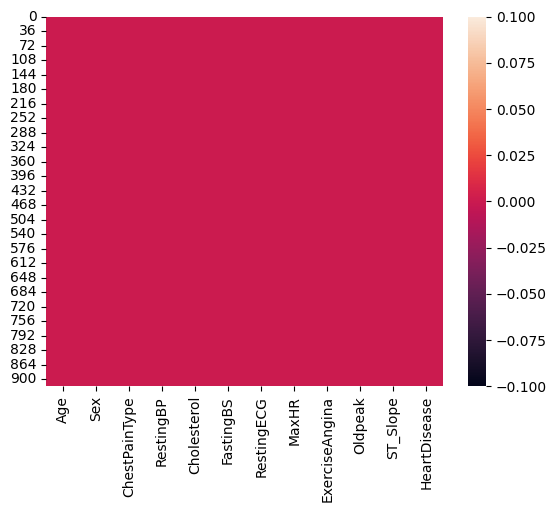

In [121]:
sns.heatmap(df.isnull())

[Text(0, 0, '410'), Text(0, 0, '508')]

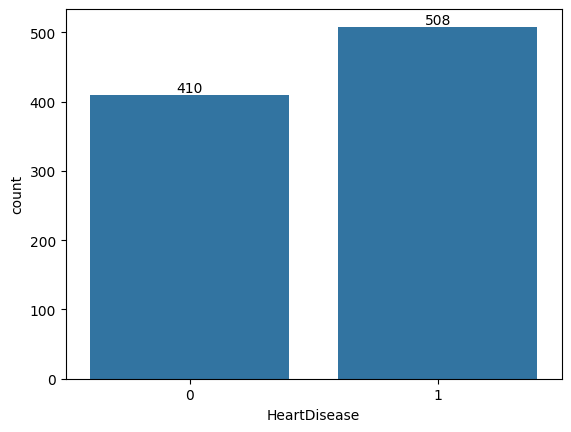

In [122]:
ax = sns.countplot(x='HeartDisease', data=df)
ax.bar_label(ax.containers[0])

In [123]:
minAge = df['Age'].min()
maxAge = df['Age'].max()
print("Age ranges from",minAge,"-",maxAge)

Age ranges from 28 - 77


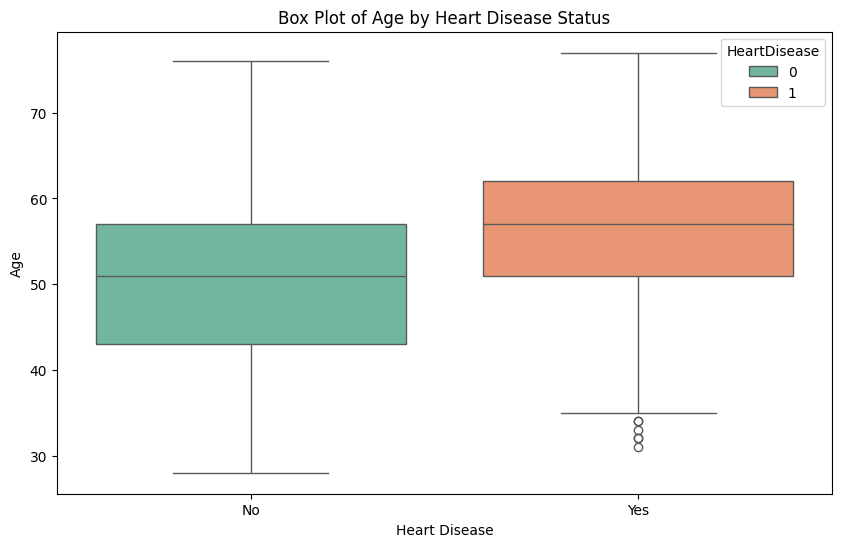

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df,hue="HeartDisease",
             palette="Set2")
plt.title('Box Plot of Age by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

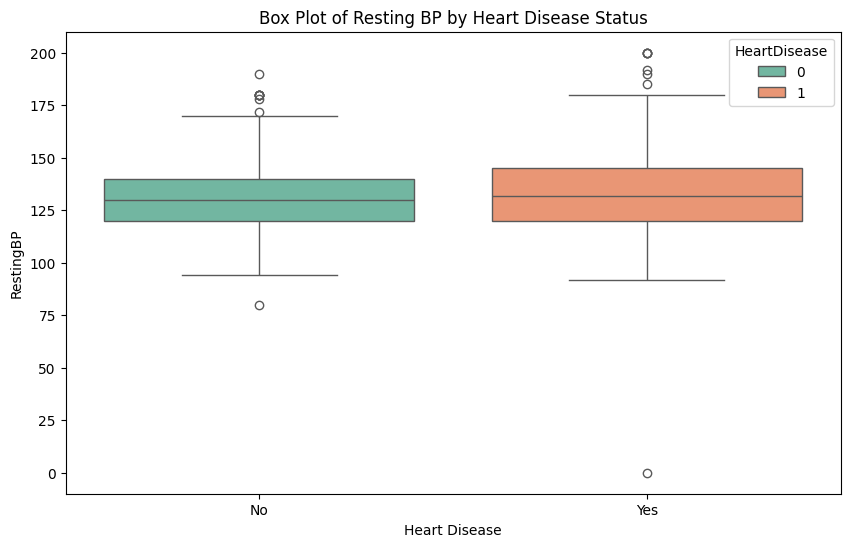

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='RestingBP', data=df,hue="HeartDisease",
             palette="Set2")
plt.title('Box Plot of Resting BP by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('RestingBP')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

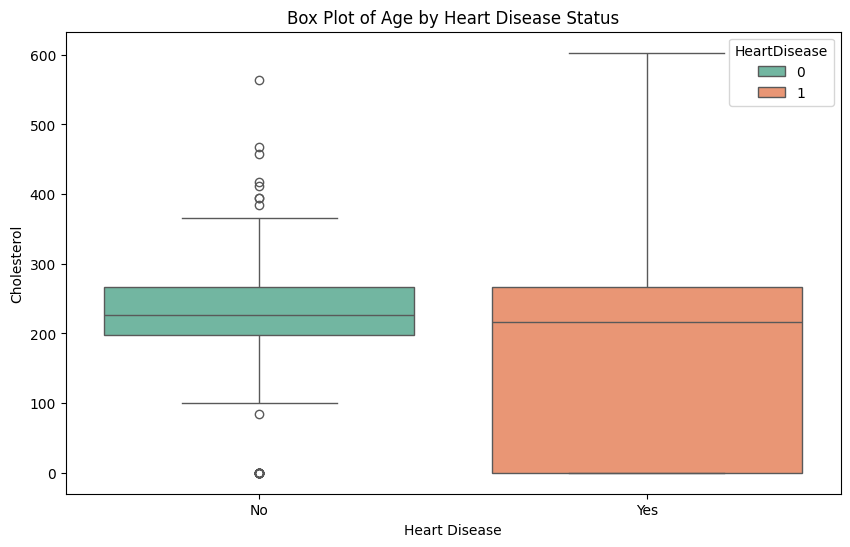

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df,hue="HeartDisease",
             palette="Set2")
plt.title('Box Plot of Age by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

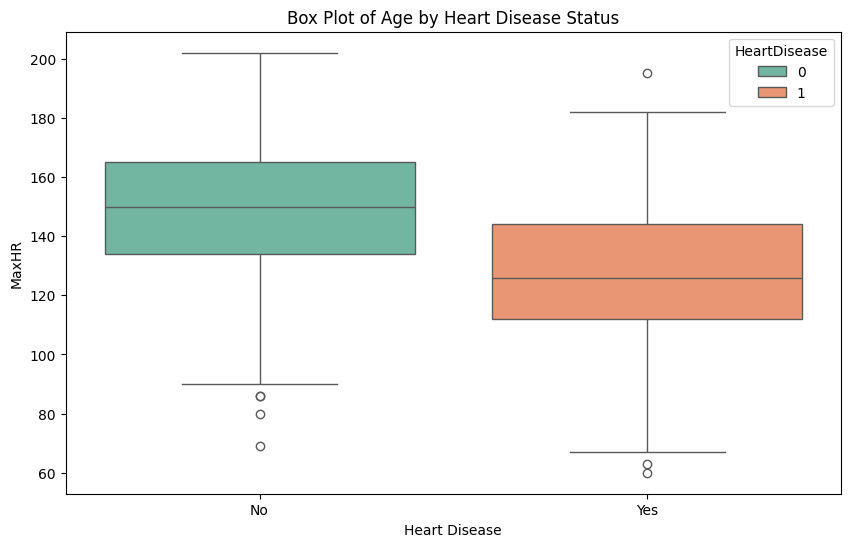

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df,hue="HeartDisease",
             palette="Set2")
plt.title('Box Plot of Age by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('MaxHR')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

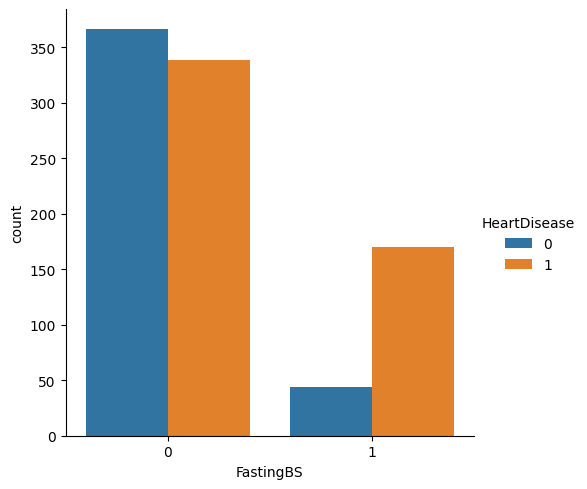

In [128]:
sns.catplot(x='FastingBS',hue='HeartDisease',data=df,kind="count")

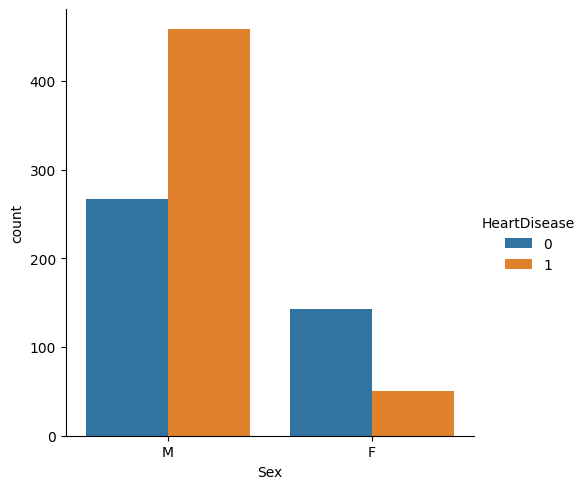

In [129]:
sns.catplot(x='Sex',hue='HeartDisease',data=df,kind="count")

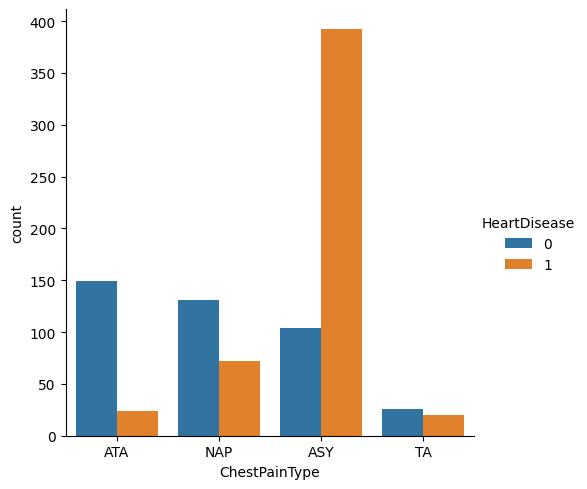

In [130]:
sns.catplot(x='ChestPainType',hue='HeartDisease',data=df,kind="count")

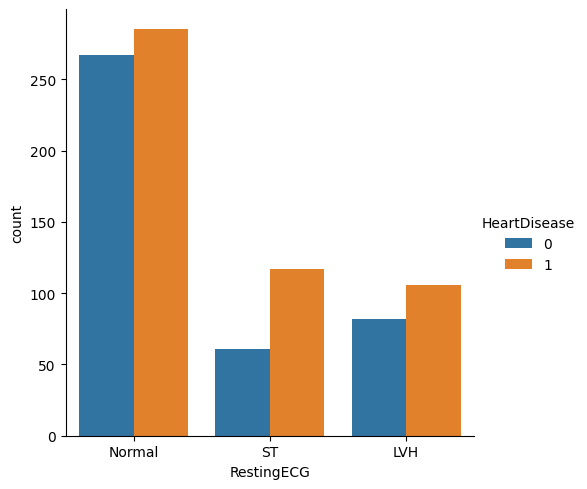

In [131]:
sns.catplot(x='RestingECG',hue='HeartDisease',data=df,kind="count")

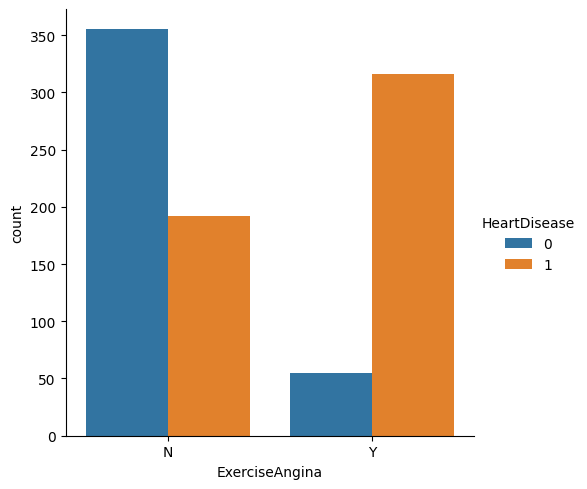

In [132]:
sns.catplot(x='ExerciseAngina',hue='HeartDisease',data=df,kind="count")

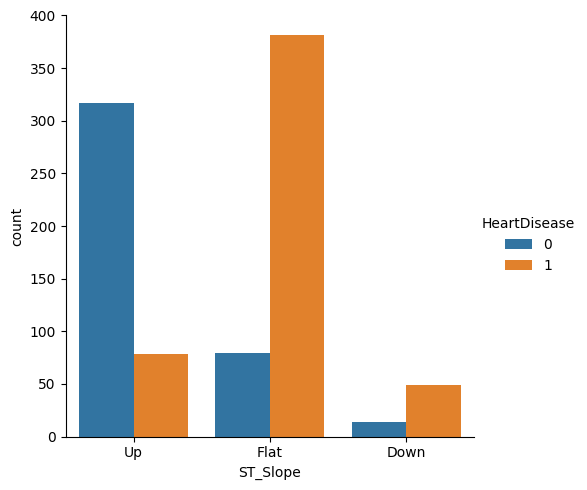

In [133]:
sns.catplot(x='ST_Slope',hue='HeartDisease',data=df,kind="count")

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [135]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed_df = pd.DataFrame(X_preprocessed)

In [136]:
corr_matrix = X_preprocessed_df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_reduced = X_preprocessed_df.drop(to_drop, axis=1)
print(to_drop)

[]


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [138]:
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
best_lr_params = grid_search_lr.best_params_
best_lr_score = grid_search_lr.best_score_

In [139]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, n_iter=10, scoring='accuracy', random_state=42)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
best_xgb_score = grid_search_xgb.best_score_

In [140]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_cm = confusion_matrix(y_test, y_pred_nn)
nn_cr = classification_report(y_test, y_pred_nn)

Epoch 1/50


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4302 - loss: 0.7717 - val_accuracy: 0.6122 - val_loss: 0.6345
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.6119 - val_accuracy: 0.7551 - val_loss: 0.5529
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.5486 - val_accuracy: 0.7755 - val_loss: 0.4879
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.4802 - val_accuracy: 0.8027 - val_loss: 0.4377
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4308 - val_accuracy: 0.8231 - val_loss: 0.4064
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8770 - loss: 0.3754 - val_accuracy: 0.8367 - val_loss: 0.3869
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3720 - val_accuracy: 0.8299 - val_loss: 0.3751
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3756 - val_accuracy: 0.8299 - val_loss: 0.3655
Epo

In [141]:
y_pred_best_lr = best_lr.predict(X_test)
best_lr_accuracy = accuracy_score(y_test, y_pred_best_lr)

y_pred_best_xgb = best_xgb.predict(X_test)
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)

# Logistic Regression Results
best_lr_cm = confusion_matrix(y_test, y_pred_best_lr)
best_lr_cr = classification_report(y_test, y_pred_best_lr)

# XGBoost Results
best_xgb_cm = confusion_matrix(y_test, y_pred_best_xgb)
best_xgb_cr = classification_report(y_test, y_pred_best_xgb)

print("Comparison of Results")
print("Best Logistic Regression:")
print("Confusion Matrix:")
print(best_lr_cm)
print("Classification Report:")
print(best_lr_cr)
print("Accuracy:",best_lr_accuracy)
print("Best params:",best_lr_params)
print("CV score:",best_lr_score)
print("")

print("Best XGBoost")
print("Confusion Matrix:")
print(best_xgb_cm)
print("Classification Report:")
print(best_xgb_cr)
print("Accuracy:",best_xgb_accuracy)
print("Best params:",best_xgb_params)
print("CV score:",best_xgb_score)
print("")

print("Neural Network")
print("Confusion Matrix:")
print(nn_cm)
print("Classification Report:")
print(nn_cr)
print("Accuracy:",nn_accuracy)
print("")

Comparison of Results
Best Logistic Regression:
Confusion Matrix:
[[67 10]
 [17 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy: 0.8532608695652174
Best params: {'C': 1, 'solver': 'saga'}
CV score: 0.866489609542447

Best XGBoost
Confusion Matrix:
[[65 12]
 [13 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8641304347826086
Best params: {'subsample': 0.9, 'n_est